In [1]:
import numpy as np
import matplotlib.pyplot as plt
import poppy
import astropy.units as u
from custom_optics import ShiftedGaussianAperture

# Set up poppy optical system with decentered aperture and defocus

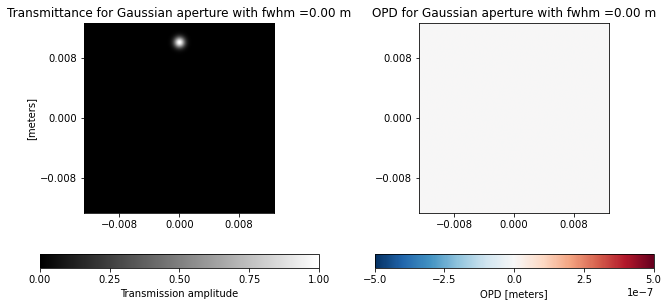

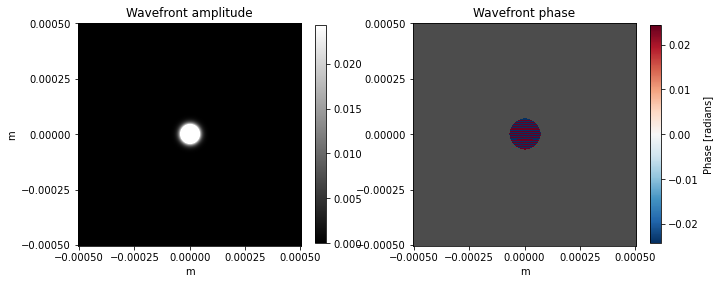

In [12]:
pupil_d = 25.4e-3*u.m
wvl = 1e-6*u.m
npix = 512
OS = 4
efl = 100e-3*u.m

aper = ShiftedGaussianAperture(w=1e-3*u.m,shifty=1e-2*u.m,pupil_diam=pupil_d)
thin_lens = poppy.QuadraticLens(efl)

plt.figure(figsize=[11,5])
aper.display(what='both')
plt.show()

wf = poppy.FresnelWavefront(pupil_d,wavelength=wvl,npix=npix,oversample=OS)
wf *= aper
wf *= thin_lens
wf.propagate_fresnel(efl + 0*1e-3*u.m)

plt.figure(figsize=[11,5])
wf.display(what='both',colorbar=True)
plt.show()


# Configure a Ray Transfer Matrix and Gaussian Beam Propgation using the proposed method

In [3]:
def propagate_qpinv_abcd(Qinv,A,B,C,D):

    num = C + D @ Qinv
    den = A + B @ Qinv

    return num @ np.linalg.inv(den)

def compute_misalign_phase(B,A,r1m,r2,k):
    """
    Parameters
    ----------
    B,A : numpy.ndarrays
        elements of the ray transfer matrix 
    r1m : numpy.ndarray of size 2
        misalignment in position in x then y
    r2 : numpy.ndarray of dimension 2
        detector coordinates in x and y. First dimension holds x/y, second holds coordinate
    k : float, complex
        wave number of simulation
    """



